In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('heart.csv')

In [14]:
print("Columns in dataset:", df.columns)

Columns in dataset: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [15]:
print(df.head())
print(df.tail())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0      1.0      168      0      1.0      2   
1   53    1   0       140   203    1      0.0      155      1      3.1      0   
2   70    1   0       145   174    0      1.0      125      1      2.6      0   
3   61    1   0       148   203    0      1.0      161      0      0.0      2   
4   62    0   0       138   294    1      1.0      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0      1.0      164      1      0.0   
1021   60    1   0       125   258    0      0.0      141      1      2.8   
1022   47    1   0       110   275    0      0.0      118      1      1.0   
1023   50    0   0       110   254    0      0.0      159      0      0.0

In [16]:
print(df.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1024.000000  1025.000000  1025.000000  1023.000000   
mean      0.149268     0.529297   149.114146     0.336585     1.072043   
std       0.356527     0.527931    23.005724     0.472772     1.176008   
min       0.000000     0.000000    71.000000  

In [17]:
print("Missing values before imputation:\n", df.isnull().sum())

Missing values before imputation:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     1
thalach     0
exang       0
oldpeak     2
slope       0
ca          0
thal        0
target      0
dtype: int64


In [19]:
df.fillna(df.mean(), inplace=True)
print("Missing values after imputation:\n", df.isnull().sum())


Missing values after imputation:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [21]:
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['chol'] >= lower_bound) & (df['chol'] <= upper_bound)]
print("Data shape after outlier removal:", df.shape)

Data shape after outlier removal: (1009, 14)


In [22]:
chol_mean = df['chol'].mean()
chol_median = df['chol'].median()
chol_std = df['chol'].std()
print(f"Cholesterol - Mean: {chol_mean}, Median: {chol_median}, Std: {chol_std}")

bp_mean_hd = df[df['target'] == 1]['trestbps'].mean()
bp_mean_no_hd = df[df['target'] == 0]['trestbps'].mean()
print(f"Mean BP with heart disease: {bp_mean_hd}, without: {bp_mean_no_hd}")

max_hr = df['thalach'].max()
min_hr = df['thalach'].min()
print(f"Max HR: {max_hr}, Min HR: {min_hr}")

Cholesterol - Mean: 242.98315163528247, Median: 239.0, Std: 45.38513227615413
Mean BP with heart disease: 129.20309477756285, without: 133.97764227642276
Max HR: 202, Min HR: 71


In [26]:
sorted_by_chol = df.sort_values(by='chol', ascending=False)
high_chol_patients = df[df['chol'] > 300]
old_abnormal_ecg = df[(df['age'] > 60) & (df['restecg'] > 0)]



In [29]:
reshaped_data = np.reshape(df[['age', 'chol', 'thalach']].values, (-1, 3))
split_data = np.array_split(reshaped_data, 3)


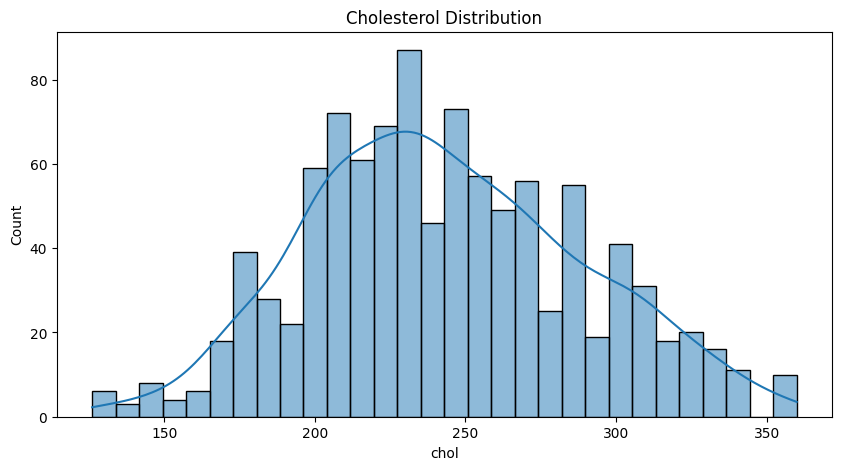

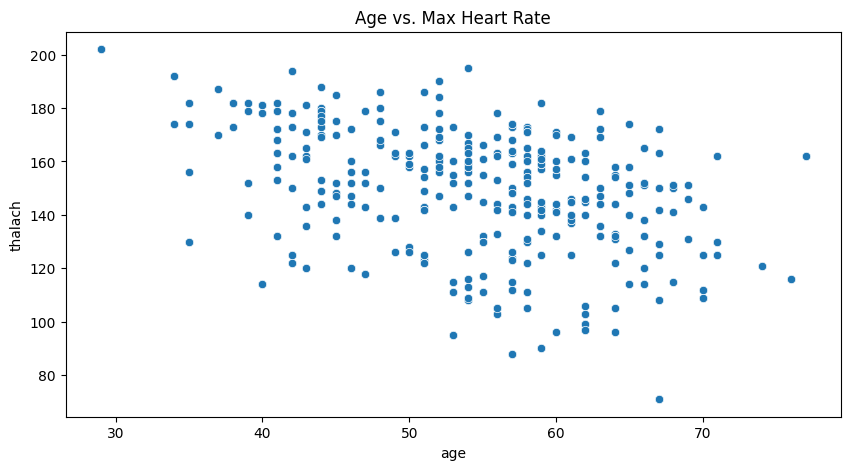

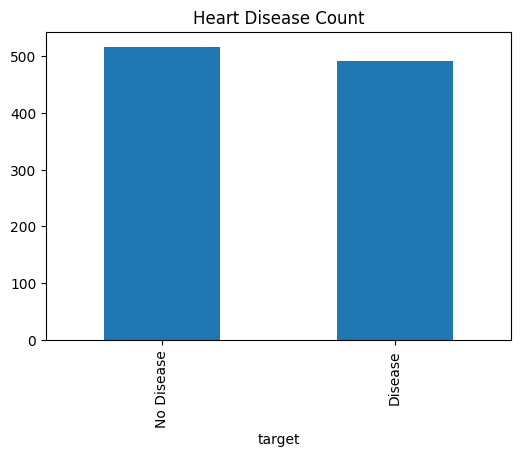

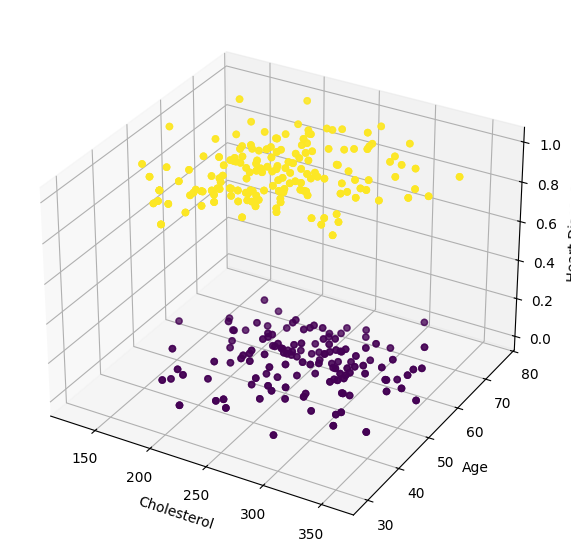

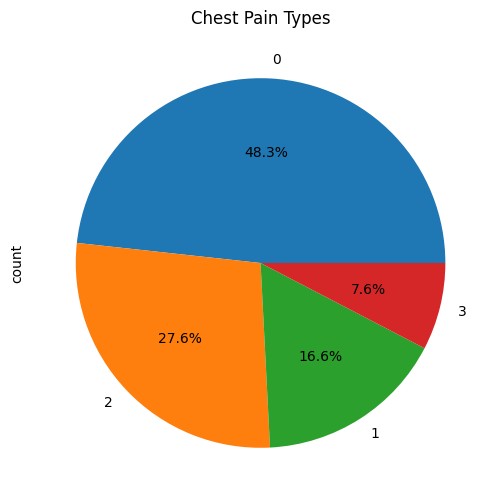

In [30]:
plt.figure(figsize=(10, 5))
sns.histplot(df['chol'], bins=30, kde=True)
plt.title('Cholesterol Distribution')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['age'], y=df['thalach'])
plt.title('Age vs. Max Heart Rate')
plt.show()

plt.figure(figsize=(6, 4))
df['target'].value_counts().plot(kind='bar')
plt.title('Heart Disease Count')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.show()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['chol'], df['age'], df['target'], c=df['target'])
ax.set_xlabel('Cholesterol')
ax.set_ylabel('Age')
ax.set_zlabel('Heart Disease')
plt.show()

plt.figure(figsize=(6, 6))
df['cp'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Chest Pain Types')
plt.show()
